In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import mord
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#Read the data directly! white wine and red wine... what is the good wine
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')      

In [2]:
df.head() # white wine data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df2.head() # red wine data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Create a dummy for white wines! i want to know if the white wine better than red wine
df['white']=1
df2['white']=0

#Combine the two datasets
Wine=pd.concat([df,df2],axis=0)

#Delete less frequent categories. we will delete wine with quality under 3 and over 9
Wine=Wine[Wine.quality != 3]
Wine=Wine[Wine.quality != 9]

print(df2.head(5))
print('-----------------------------------------------------------------------')
print(Wine.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  white  
0      9.4        5      0  
1      9.8        5      0  

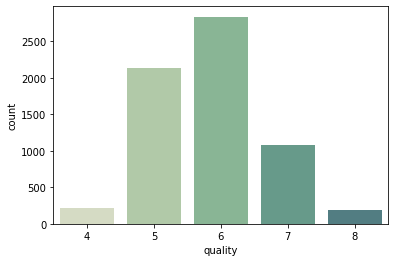

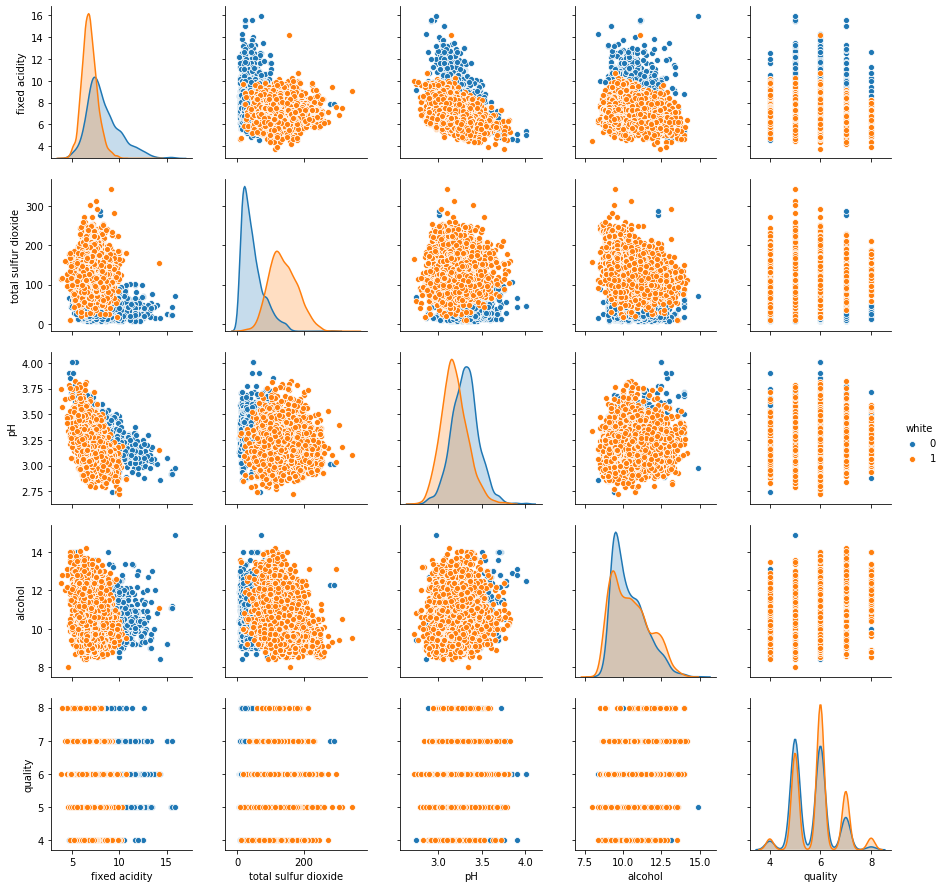

In [18]:
### Descriptive Analysis
sns.countplot(Wine['quality'],palette=sns.cubehelix_palette(8, start=.5, rot=-.75))

sns.pairplot(data=Wine , hue='white', vars=['fixed acidity','total sulfur dioxide', 'pH',
'alcohol' ,'quality']) # pairplot anschauen, damit wir Gefühl über Verteilungen bekommen ->
# white wine is orange and red wine is blue
# red wine has more alcohol

## Multinomial Model

In [5]:
### Split the data
X_train , X_test , y_train , y_test = train_test_split( Wine.drop(['quality'],axis=1),Wine['quality'], test_size =0.33, random_state =42)
                                    # train_test_split( X,                             y,              test_size=0.33,   random_state=42)
### Estimation of Multinomial Logit
MulitLogit=sm.MNLogit(y_train ,X_train)
MulitLogit_fit=MulitLogit.fit()
print(MulitLogit_fit.summary ())

Optimization terminated successfully.
         Current function value: 1.047898
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 4329
Model:                        MNLogit   Df Residuals:                     4281
Method:                           MLE   Df Model:                           44
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.1656
Time:                        20:41:24   Log-Likelihood:                -4536.4
converged:                       True   LL-Null:                       -5436.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
           quality=5       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.1734      0.104     -1.662      0.096      -0.378       0.031

## Ordinal model

In [6]:
### Estimation of Ordered Logit
OrdLogit=mord.LogisticAT(alpha=0)
OrdLogit.fit(X_train ,y_train )
print(pd.concat([pd.DataFrame(Wine.drop(['quality'],axis=1). columns),
pd.DataFrame(OrdLogit.coef_) ], axis=1))

                       0         0
0          fixed acidity  0.078403
1       volatile acidity -4.520155
2            citric acid -0.430892
3         residual sugar  0.059793
4              chlorides -1.809547
5    free sulfur dioxide  0.021157
6   total sulfur dioxide -0.005331
7                density -3.346475
8                     pH  0.457757
9              sulphates  1.335977
10               alcohol  0.911828
11                 white -0.318638


In [7]:
OrdLogit.theta_

array([ 3.30012821,  6.60240159,  9.1461616 , 11.45644161])

### Distribution of y_star

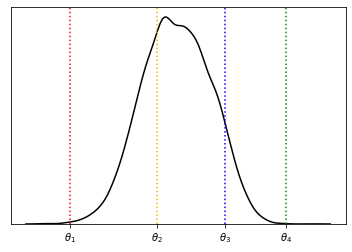

In [8]:

#Calculate y_star (X*Beta)
y_star= Wine.drop(['quality'],axis=1) @OrdLogit.coef_


figure = sns.distplot(y_star , hist=False ,color='black')
figure.set_xticks((OrdLogit.theta_))
figure.set_xticklabels((r'$\theta_ {1}$', r'$\theta_2$', r'$\theta_3$', r'$\theta_4$'))
figure.set_yticks ([])


figure.axvline(OrdLogit.theta_[0], 0, 1, linestyle="dotted",color='red')
figure.axvline(OrdLogit.theta_[1], 0, 1, linestyle="dotted",color='orange')
figure.axvline(OrdLogit.theta_[2], 0, 1, linestyle="dotted",color='blue')
figure.axvline(OrdLogit.theta_[3], 0, 1, linestyle="dotted",color='green')

## Model Evaluations

### Multinomial Model

In [9]:
y_pred_ML_IS=MulitLogit_fit.predict(X_train).idxmax(axis=1).map({0:4 ,1:5 ,2:6 ,3:7 ,4:8})
y_pred_ML_OOS=MulitLogit_fit.predict(X_test).idxmax(axis=1).map({0:4 ,1:5 ,2:6 ,3:7 ,4:8})
print('In Sample:\n\n ',classification_report(y_train ,y_pred_ML_IS))
print('Out of Sample:\n\n ',classification_report(y_test ,y_pred_ML_OOS))

In Sample:

                precision    recall  f1-score   support

           4       0.56      0.03      0.06       151
           5       0.60      0.60      0.60      1424
           6       0.52      0.71      0.60      1883
           7       0.47      0.20      0.28       732
           8       0.00      0.00      0.00       139

    accuracy                           0.54      4329
   macro avg       0.43      0.31      0.31      4329
weighted avg       0.52      0.54      0.51      4329

Out of Sample:

                precision    recall  f1-score   support

           4       0.62      0.08      0.14        65
           5       0.59      0.62      0.61       714
           6       0.53      0.68      0.60       953
           7       0.46      0.20      0.28       347
           8       0.00      0.00      0.00        54

    accuracy                           0.55      2133
   macro avg       0.44      0.32      0.32      2133
weighted avg       0.53      0.55      0.52  

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Ordinal Model

In [10]:
print(classification_report(y_train , OrdLogit.predict(X_train )))
print(classification_report(y_test , OrdLogit.predict(X_test)))

              precision    recall  f1-score   support

           4       0.67      0.01      0.03       151
           5       0.61      0.54      0.58      1424
           6       0.52      0.74      0.61      1883
           7       0.48      0.24      0.32       732
           8       0.00      0.00      0.00       139

    accuracy                           0.54      4329
   macro avg       0.46      0.31      0.31      4329
weighted avg       0.53      0.54      0.51      4329

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        65
           5       0.61      0.55      0.58       714
           6       0.51      0.71      0.60       953
           7       0.45      0.22      0.30       347
           8       0.00      0.00      0.00        54

    accuracy                           0.54      2133
   macro avg       0.31      0.30      0.29      2133
weighted avg       0.51      0.54      0.51      2133

